Dataset: Jogadores da Liga Alemã de Futebol (Bundesliga).

Importando Bibliotecas

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import textwrap

Importando dataset com Pandas

In [5]:
dados = pd.read_csv("bundesliga_players.csv");

Criação do gráfico de barras

In [ ]:
# Quebrar linha em posições que tem mais de 1 palavra (A cada 10 letras quebra linha).
rotulos_quebrados = [textwrap.fill(pos, 10) for pos in dados['position']]

#Criação do gráfico

plt.figure(figsize=(15,5))
plt.bar(rotulos_quebrados, dados['price']);
plt.ylabel('Valor em milhões de euros');
plt.title('Posição')
plt.show();

Gráfico de Setores (Pizza)

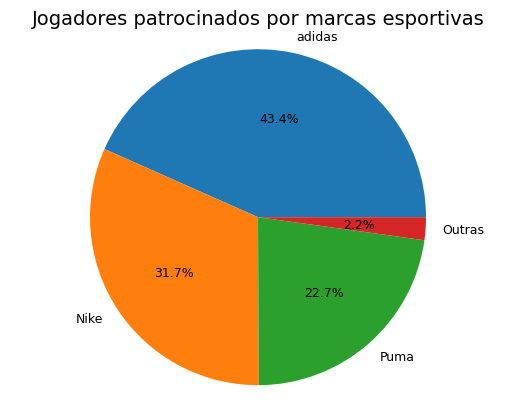

In [38]:
## Agrupando o número de dados pela coluna "outfitter" (marca) e contando quantos tem de cada;
agrupado = dados['outfitter'].value_counts()

## Somando porcentagem das categorias
total = agrupado.sum()
porcentagens = agrupado / total * 100

## Identificando as categorias com porcentagens inferiores a 2%:
categorias_outras = porcentagens[porcentagens < 2].index

## Combinando as categorias menores que 2% em uma única categoria chamada "outras":
agrupado.loc[categorias_outras] = porcentagens[categorias_outras].sum()
agrupado = agrupado.drop(categorias_outras)
agrupado['Outras'] = porcentagens[categorias_outras].sum()

# Criando o gráfico Pie

agrupado.plot.pie(autopct='%1.1f%%', fontsize=9)


plt.axis('equal')
plt.title('Jogadores patrocinados por marcas esportivas', fontsize=14)
plt.ylabel('')
plt.show();


Gráfico Geográfico

In [63]:
import plotly as py
import plotly.graph_objects as go

dados['nationality'] = dados['nationality'].str.split().str[0]

locations = dados['nationality'].unique()
z = np.zeros_like(locations)

for i in range(locations.size):
    z[i] = np.sum(dados['price'][dados['nationality'] == locations[i]])

data = dict(
    type='choropleth',
    locations=dados['nationality'].unique(),
    locationmode= 'country names',
    colorscale=['#56b2e3', '#3f22a1', '#2b1452'],
    z=z)

map = go.Figure(data=[data])
map.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed